## Benchmarking with Annotations 
#### A Quadratically Constrained Quadratic Programs Approach

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import statsmodels.tsa.interp

from sklearn.cross_decomposition import CCA

np.set_printoptions(precision = 4)
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 10)
plt.rcParams["figure.figsize"] = (25,10)

#### Data

In [2]:
data = pd.read_csv("GDP.csv")

In [7]:
data = data.loc[data["Country Name"].isin(["Australia", "Brazil"])].copy()

data = data.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"]).set_index("Country Name").T.copy()

data.index = pd.to_datetime(data.index)

In [8]:
data["Brazil_Downsample"] = data["Brazil"]

data.loc[::2,"Brazil_Downsample"] = np.NaN

aud_gdp = data["Australia"].values

brazil_downsample_gdp = data["Brazil_Downsample"].dropna().values

In [37]:
X = data["Australia"].values[:-1].reshape(-1,2)
Y = data["Brazil_Downsample"].dropna().values.reshape(-1,1)

model = CCA(n_components=1)
X_c, Y_c = model.fit_transform(X,Y)

np.corrcoef(X_c.T, Y_c.T)[0,1]

0.9865444178287738

In [9]:
brazil_upsample = statsmodels.tsa.interp.dentonm(aud_gdp, brazil_downsample_gdp, freq = "other", k = 2)

data["Brazil_Upsample"] = brazil_upsample * 2

data

Country Name,Australia,Brazil,Brazil_Downsample,Brazil_Upsample
1960-01-01,1.857767e+10,1.516557e+10,NaN,1.366499e+10
1961-01-01,1.965282e+10,1.523685e+10,1.523685e+10,1.680872e+10
1962-01-01,1.989249e+10,1.992629e+10,NaN,2.191470e+10
1963-01-01,2.150745e+10,2.302148e+10,2.302148e+10,2.412826e+10
1964-01-01,2.376414e+10,2.121189e+10,NaN,2.132872e+10
...,...,...,...,...
2016-01-01,1.208850e+12,1.795700e+12,NaN,1.943361e+12
2017-01-01,1.329190e+12,2.063510e+12,2.063510e+12,2.183659e+12
2018-01-01,1.432880e+12,1.916950e+12,NaN,1.990473e+12
2019-01-01,1.396570e+12,1.877810e+12,1.877810e+12,1.765147e+12


In [38]:
data[["Brazil","Brazil_Upsample"]].corr().iloc[0,1]

0.9885990029358329

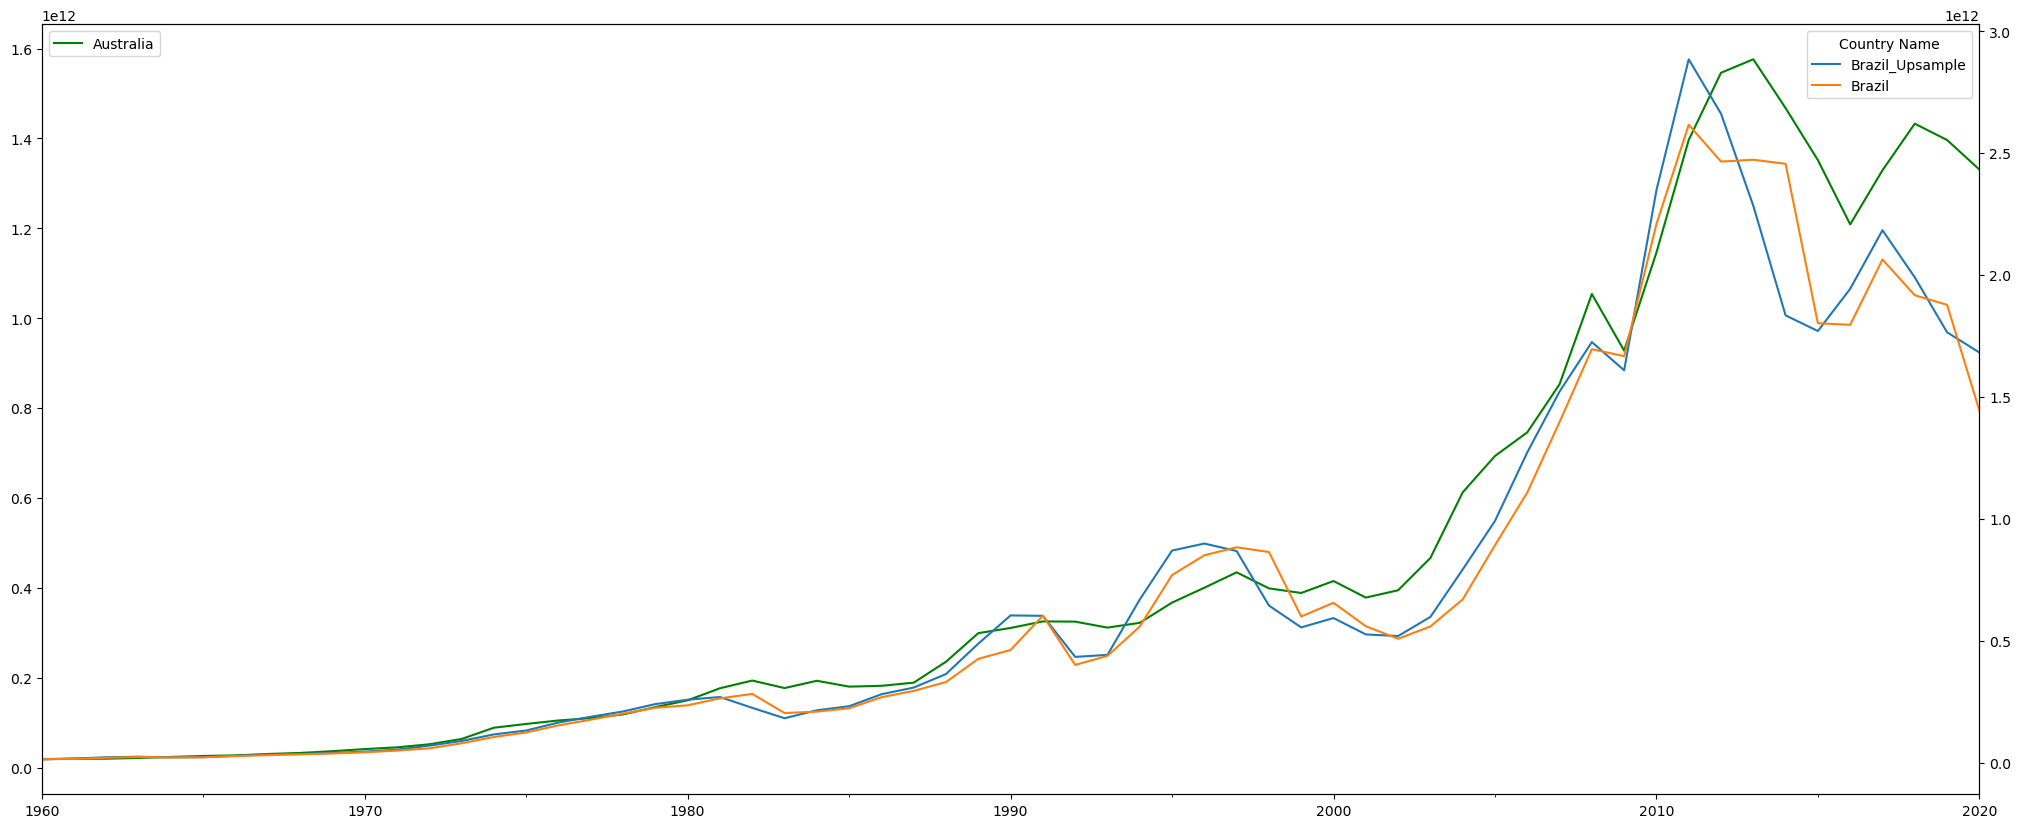

In [11]:
data[["Australia"]].plot(color = "green")
plt.legend(loc='upper left')
ax = plt.gca().twinx()
data[["Brazil_Upsample", "Brazil"]].plot(ax = ax);
plt.show();

#### CCA

#### Benchmarking 

- high_frequency_data
- low_frequency_data: the first entry here lines up with the first there
- annotation_data: length of high_frequency (only us non-null entries | default all NaN) 
- objective: difference_difference, log_difference_difference, ratio_ratio, ratio_difference (default), ratio_ratio_difference
- frequency: number of high freq adding up to low freq 
- linear_constraint: sum, average (default average)
- linear_constraint_type: back, forward, mid (default mid)
- quadratic_constraint_hyperparameter: higher is more important (default 1) 

